# Movie Data Analysis for Microsoft's New Studio

## Overview

Microsoft’s goal is to establish a new movie studio, and at the same time the company has clear intentions to make good movies. The goal of this project is to use data to make recommendations about what type of movie should be made to increase revenue for Microsoft’s new movie studio. In the analysis, the EDA method is employed to examine patterns of movie performance to provide insights into performance.

![alt text](Images/Preface.jpg)

## Business Understanding

Microsoft is planning to venture into the movie production business but lacks the necessary knowledge to produce successful movies. To develop a winning strategy for this new endeavor, Microsoft requires insights into the types of movies that have been most successful in recent years. Key questions include: Which genres are most profitable? Which runtimes and release years are associated with box office success? What is the impact of ratings and number of votes on a movie's success? Answering these questions will guide Microsoft in making informed decisions on the types of films to produce, ensuring higher chances of success in the competitive movie industry.

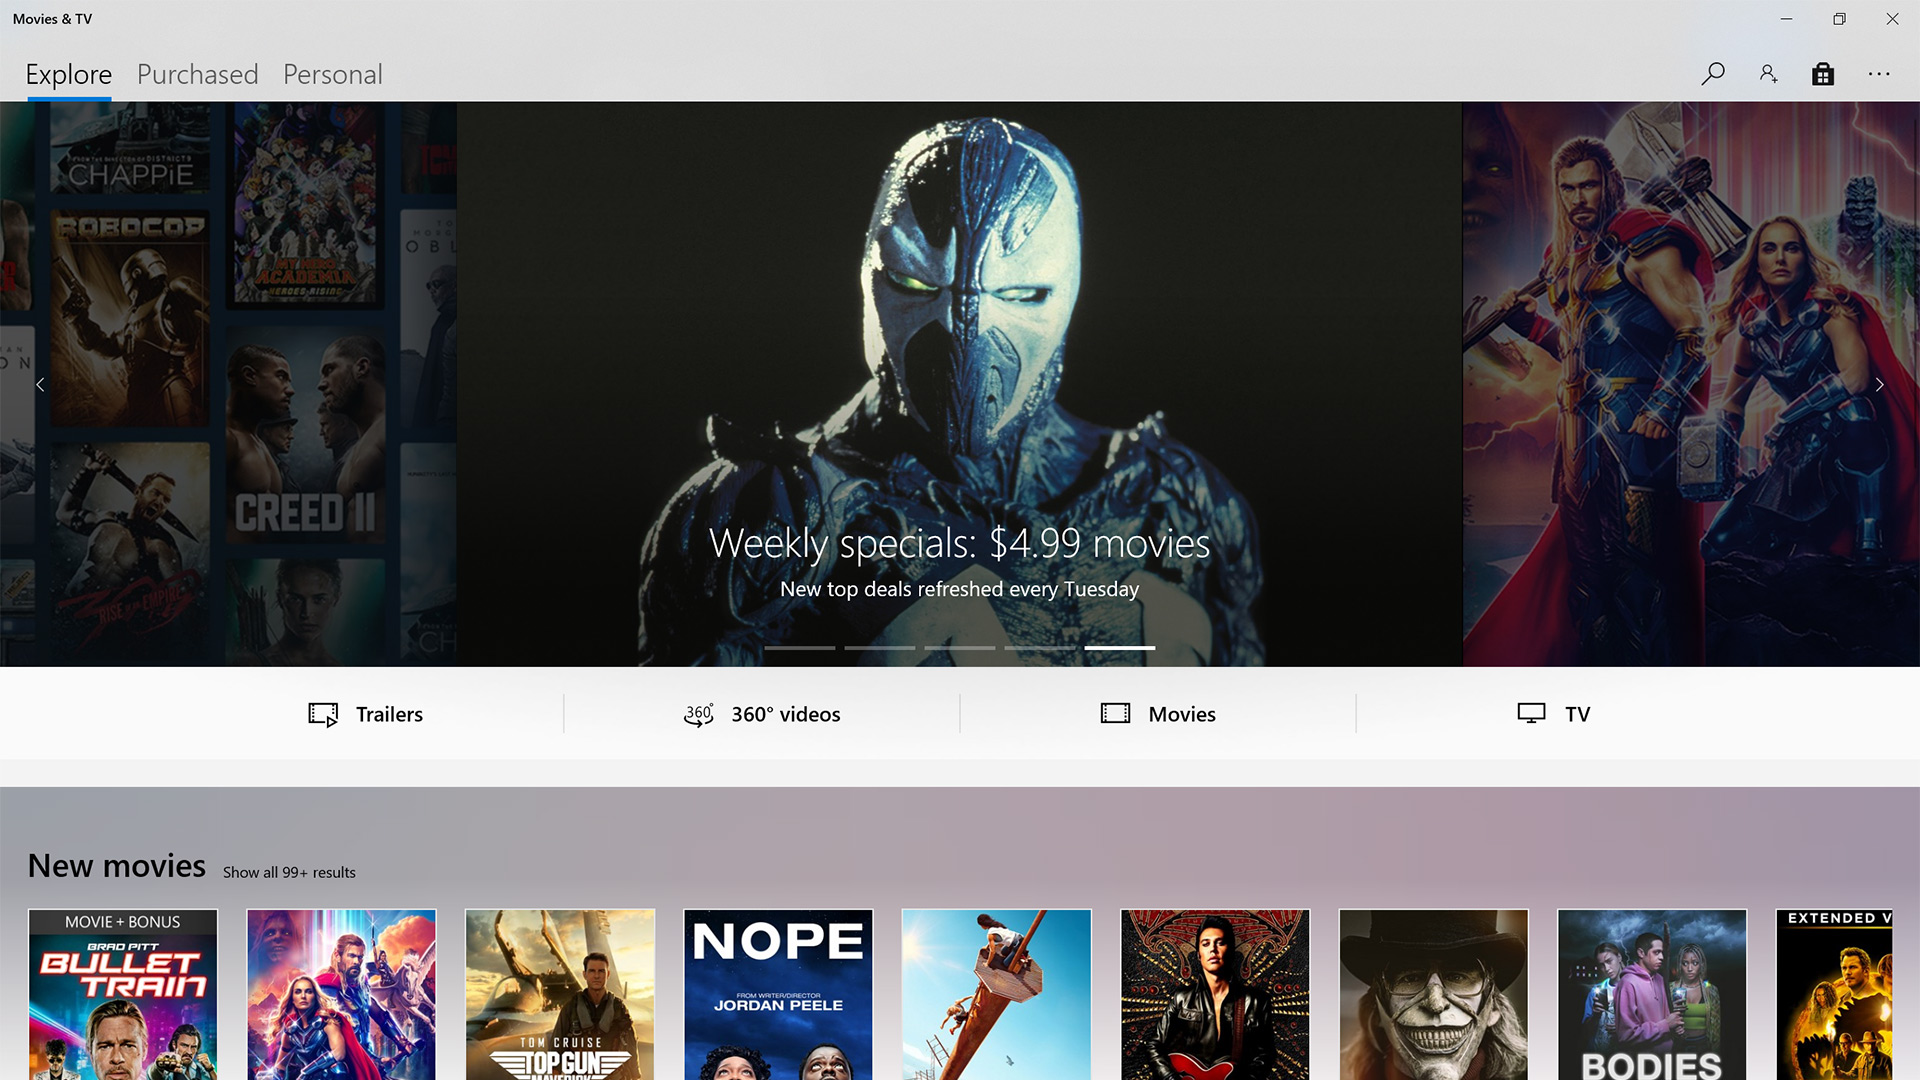

## Data Understanding

The project utilizes data from multiple sources, including Box Office Mojo, IMDB, and Rotten Tomatoes, consolidated in various formats such as CSV and SQLite databases. The IMDB database includes detailed tables like movie_basics, movie_ratings, principals, persons, known_for, directors, writers, and movie_akas. The CSV file from Box Office Mojo contains information on movie gross earnings categorized by title, studio, domestic and foreign gross, and release year. Understanding these datasets involves identifying relevant features, such as genres, ratings, and earnings, and determining how they interrelate to provide comprehensive insights into box office success.

In [4]:
import pandas as pd
import sqlite3
import numpy as np

In [8]:
conn = sqlite3.connect('data/im.db')
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')

### Movie Basics

The movie_basics table contains fundamental movie information. It includes columns for `movie_id` (unique identifier), `primary_title` and `original_title"`(movie titles), `start_year` (release year), `runtime_minutes` (duration), and `genres` (categories like Action, Drama, etc.). This table provides essential data for analyzing film characteristics and their correlations with success metrics.

In [12]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [20]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [29]:
# % of empty cells
movie_basics.isnull().sum()/movie_basics.shape [0] *100

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

The `runtime_minutes` column seems to be missing a significant number of entries.

### Movie Ratings

The movie_ratings table contains ratings information for movies. It includes columns for `movie_id` (unique identifier), `averagerating` (average rating score), and `numvotes` (number of votes). This table is crucial for analyzing the audience reception and popularity of films, helping to identify trends in movie success based on ratings and vote counts.

In [38]:
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [21]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The data in `movie_ratings` table is complete

### Bom Movie Gross

The bom.movie_gross.csv file contains box office revenue data for movies. It includes columns for `title` (movie title), `studio` (producing studio), `domestic_gross` (earnings in the domestic market), `foreign_gross` (earnings in the foreign market), and `year` (release year). This data is essential for analyzing the financial performance of films, identifying profitable genres, and understanding market trends.

In [19]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [39]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [30]:
# % of null entries in the data
bom_movie_gross.isnull().sum()/movie_basics.shape [0] *100

title             0.000000
studio            0.003421
domestic_gross    0.019159
foreign_gross     0.923746
year              0.000000
dtype: float64

The `foreign_gross` column misses significant data/entries.

## Data Preparation

I will clean the `movie_basics` DataFrame by removing rows where the `runtime_minutes` column has missing values. This step ensures that all movies in my analysis have specified durations, which is crucial for understanding how runtime impacts a movie's performance. After this operation, I will verify the cleaned DataFrame by displaying its first few rows.

In [34]:
# Removing rows with missing values in the 'runtime_minutes' column of movie_basics DataFrame
movie_basics_cleaned = movie_basics.dropna(subset=['runtime_minutes'])

In [35]:
# Display the first few rows of the cleaned DataFrames to verify the changes
movie_basics_cleaned.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


Next is to merge the two tables `movie_basics_cleaned` and `movie_ratings` and form one dataframe `merged_imdb_data`.

In [44]:
# Merge movie_basics_cleaned and movie_ratings on 'movie_id'
merged_imdb_data = pd.merge(movie_basics_cleaned, movie_ratings, on='movie_id')

# Display the first few rows of the merged DataFrame
merged_imdb_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


I will clean the `bom_movie_gross` DataFrame by removing rows where the `foreign_gross` column has missing values. This step is essential for accurate analysis of international box office performance, ensuring that all included movies have complete data for foreign earnings. After removing these rows, I will verify the cleaned DataFrame by displaying its last *five* rows.

In [45]:
# Removing rows with missing values in the 'foreign_gross' column of bom_movie_gross DataFrame
bom_movie_gross_cleaned = bom_movie_gross.dropna(subset=['foreign_gross'])

# Display the las five rows of the cleaned DataFrames to verify the changes
bom_movie_gross_cleaned.tail()

,title,studio,domestic_gross,foreign_gross,year
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018
3353,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000,2018


In [41]:
bom_movie_gross_cleaned.inf

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            2037 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 95.5+ KB


## Data Analysis

### Genre Distribution

To analyze the `merged_IMDb_data` (merged_imdb_data) along with `bom_movie_gross`, I conducted a genre analysis aas below:

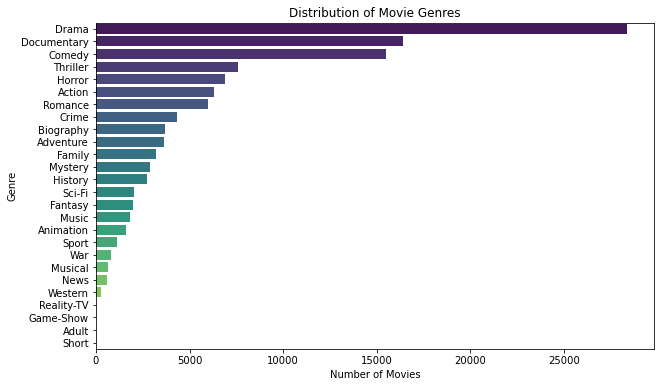

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
# Split genres and count occurrences
genre_counts = merged_imdb_data['genres'].str.get_dummies(sep=',').sum().sort_values(ascending=False)

# Plotting the genre distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

Below is a simple visualization of the top ten most frequent genres

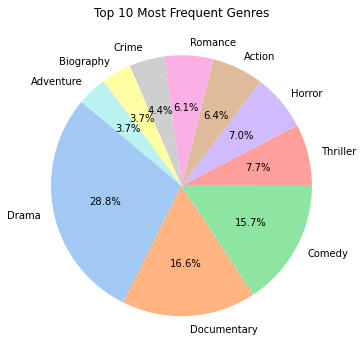

In [50]:

# Counting the frequency of each genre
genre_counts = merged_imdb_data['genres'].str.split(',', expand=True).stack().value_counts()

# piechart
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Top 10 Most Frequent Genres')
plt.ylabel('')
plt.show()

The distribution of movie genres indicates that Drama is the most prevalent genre, significantly surpassing others in the number of movies produced. This trend underscores the genre's broad appeal and versatility in storytelling. Following Drama, the Documentary genre shows a substantial presence, reflecting audiences' interest in factual and educational content. Comedy, known for its wide audience appeal and entertainment value, ranks third. Thrillers, characterized by suspense and excitement, also feature prominently. This genre distribution highlights the diverse preferences of movie audiences and the film industry's efforts to cater to varied tastes

### Distribution of Movie Ratings

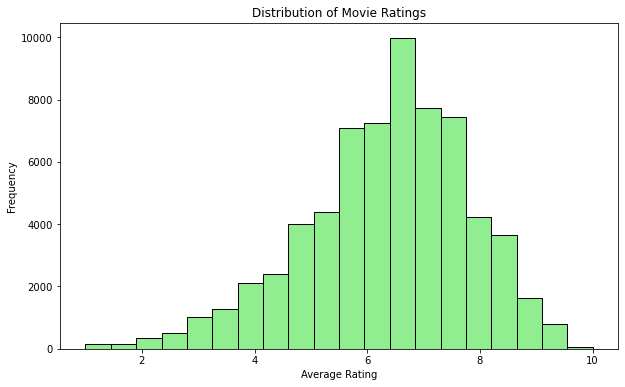

In [51]:
# Distribution of movie ratings
plt.figure(figsize=(10, 6))
plt.hist(merged_imdb_data['averagerating'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

Analyzing the distribution of movie ratings reveals that most films receive ratings between 6.5 and approximately 7.5. This clustering indicates a general trend where movies achieve moderate to above-average ratings, suggesting that a significant portion of films are perceived as decent or good by audiences. Such a distribution might reflect the industry's consistent production of films that meet minimum entertainment standards, even if they do not achieve critical acclaim. The data suggest a bell curve with a peak around these ratings, emphasizing the typical audience satisfaction range.

### Merging data for further analysis

In [56]:
# Merge merged_imdb_data and bom_movie_gross on movie title
combined_data = pd.merge(merged_imdb_data, bom_movie_gross, left_on='primary_title', right_on='title', how='inner')

# Display the first few rows of the merged DataFrame
combined_data.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
2975,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,The Chambermaid,FM,300.0,NaN,2015
2976,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,How Long Will I Love U,WGUSA,747000.0,82100000,2018
2977,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,NaN,2018
2978,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,Last Letter,CL,181000.0,NaN,2018
2979,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",8.8,2067,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018


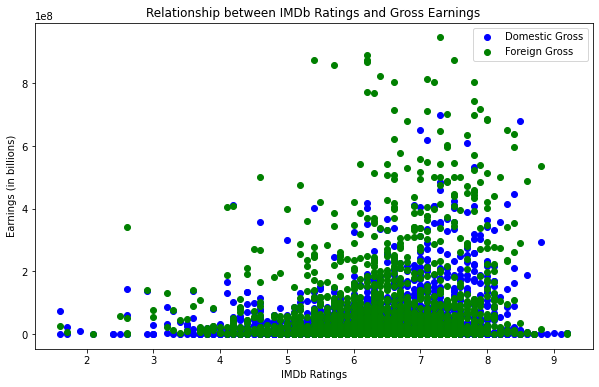

In [63]:
# Ensuring the columns are strings, then remove commas and convert to float since I got an error
combined_data['domestic_gross'] = combined_data['domestic_gross'].astype(str).str.replace(',', '').astype(float)
combined_data['foreign_gross'] = combined_data['foreign_gross'].astype(str).str.replace(',', '').astype(float)

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['averagerating'], combined_data['domestic_gross'], color='blue', label='Domestic Gross')
plt.scatter(combined_data['averagerating'], combined_data['foreign_gross'], color='green', label='Foreign Gross')
plt.title('Relationship between IMDb Ratings and Gross Earnings')
plt.xlabel('IMDb Ratings')
plt.ylabel('Earnings (in billions)')
plt.legend()
plt.show()

The relationship between IMDb ratings and gross earnings shows a complex dynamic. While higher ratings are often associated with increased earnings, particularly for foreign markets, the overall pattern suggests that many movies with moderate to high ratings still experience varied financial success. The trend indicates that while good ratings can contribute to higher earnings, especially internationally, they are not the sole determinant. Factors such as marketing, distribution, and audience appeal also significantly impact a film's financial performance, resulting in many films with excellent ratings but lower earnings.

Showing the top ten studios by Domestic and Foreign Gross Earnings below:

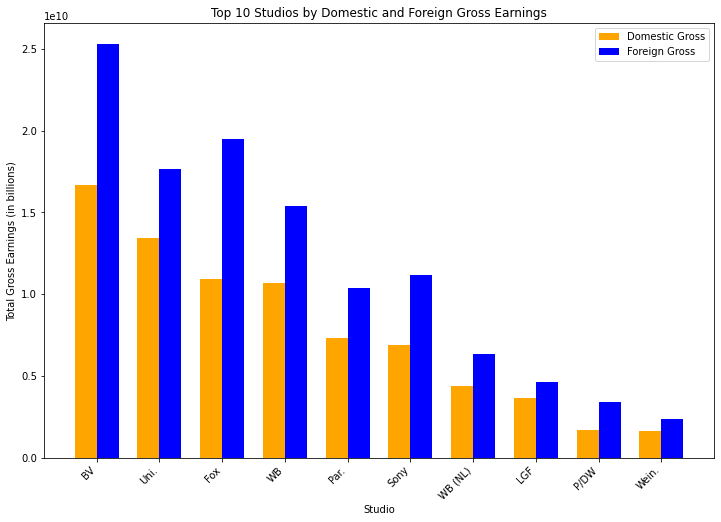

In [62]:
# Total domestic and foreign gross earnings for each studio
studio_gross = combined_data.groupby('studio')[['domestic_gross', 'foreign_gross']].sum().sort_values(by='domestic_gross', ascending=False)

# Select the top 10 studios based on domestic gross earnings
top_10_studios = studio_gross.head(10)

# Plot a grouped bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(top_10_studios))
plt.bar(index, top_10_studios['domestic_gross'], bar_width, label='Domestic Gross', color='orange')
plt.bar([i + bar_width for i in index], top_10_studios['foreign_gross'], bar_width, label='Foreign Gross', color='blue')

plt.title('Top 10 Studios by Domestic and Foreign Gross Earnings')
plt.xlabel('Studio')
plt.ylabel('Total Gross Earnings (in billions)')
plt.xticks([i + bar_width / 2 for i in index], top_10_studios.index, rotation=45, ha='right')
plt.legend()
plt.show()


The analysis of the top 10 studios by domestic and foreign gross earnings highlights BV (Buena Vista) as the leading studio, dominating both domestic and international markets. BV's strong performance reflects its successful production and distribution strategies. Following BV, Universal (Uni) and Fox also show substantial earnings, indicating their robust market presence. Warner Bros (WB) ranks highe, showcasing its consistent performance across both markets.

## Conclusions

This analysis leads to three recommendations for Microsoft's potential entry into the movie industry:

**1. Focus on Drama and Popular Genres:** Given that Drama is the most prevalent genre, followed closely by Documentary, Comedy, and Thriller, Microsoft should prioritize these genres in their content creation strategy. Investing in popular genres can attract a broad audience base, leveraging existing trends to maximize viewer engagement and satisfaction.

**2. Aim for Quality Ratings:** With most movies receiving ratings between 6.5 and 7.5, Microsoft should aim to produce films that not only entertain but also achieve high critical acclaim. Focusing on quality storytelling, strong character development, and professional production values can help secure higher ratings, which in turn can enhance marketability and profitability.

**3. Leverage Successful Studios' Strategies:** Analyzing top-performing studios like BV, Universal, and Warner Bros can provide insights into effective production and distribution strategies. Microsoft should consider partnerships or learn from these studios' marketing techniques, franchise management, and audience engagement practices to optimize their own film releases for both domestic and international markets.

## Next Steps

To proceed with the strategic planning and execution for entering the movie industry, Microsoft should consider the following steps:

1. **Market Research and Trend Analysis**
Conduct comprehensive market research to understand current trends, audience preferences, and emerging genres. This will help in identifying the most promising areas for investment and content creation, ensuring that Microsoft stays ahead of industry trends.

2. **Talent Acquisition and Partnerships:**
Invest in acquiring top talent, including directors, writers, and actors, to ensure high-quality productions. Additionally, explore partnerships with established studios, distributors, and streaming platforms to leverage their expertise and distribution networks.

3. **Pilot Projects and Testing:**
Launch pilot projects in different genres, especially those identified as popular (e.g., Drama, Comedy, Thriller). Use these projects to test the waters, gather audience feedback, and refine production strategies before making larger investments.

4. **Marketing and Distribution Strategy**
Develop a robust marketing and distribution strategy to maximize reach and profitability. This includes leveraging digital marketing, social media, and influencer partnerships, as well as planning for strategic release windows in both domestic and international markets.

*The End*